# Load Libraries

In [1]:
import sys
import math
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import re
import glob as g
import gc
from scipy import stats 
from matplotlib.ticker import AutoMinorLocator
import scipy.interpolate as interpolate
from matplotlib import cm

In [2]:
from scipy.optimize import curve_fit

# Functions

In [3]:
def mindist(sel1, sel2):
    list_o_dist = []
    for a in sel1:
        for b in sel2:
            p1 = a.position
            p2 = b.position
            dist = math.sqrt((p2[2]-p1[2])**2+(p2[1]-p1[1])**2+(p2[0]-p1[0])**2)
            list_o_dist.append(dist)
    return min(list_o_dist)

# Paths, pHs, and Stages

In [4]:
phs = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

# Load Lig Up/Down and D214 fSASA Data

In [5]:
apo_path = 'data/raw_Asojo_apo_data'
sstage = 11
lstage = 65
stages = [x for x in range(sstage, lstage+1)]
apo_data = []
for n, ph in enumerate(phs):
    data_sub = []
    for stage in stages:
        with open('{}/pH_{}_stage_{}.dat'.format(apo_path, ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    data_sub.append([float(split_line[0]), float(split_line[1])])
    apo_data.append(data_sub)

In [6]:
holo_path = 'data/raw_Asojo_holo_data'
sstage = 21
lstage = 42
stages = [x for x in range(sstage, lstage+1)]
holo_data = []
for n, ph in enumerate(phs):
    data_sub = []
    for stage in stages:
        with open('{}/pH_{}_stage_{}.dat'.format(holo_path, ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    data_sub.append([float(split_line[0]), float(split_line[1])])
    holo_data.append(data_sub)

# Inkscape Params and Colors

In [7]:
colormap = cm.get_cmap('rainbow_r', len(phs))
colors = colormap(np.linspace(0, 1, len(phs)))
scale=100

In [8]:
ink_x = 1.4 # 1.4
ink_y = 1.2 # 1.4

ink_markersize  = 2
ink_linewidth = 1

# Plot Data

In [9]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

# Apo Data

## With Labels

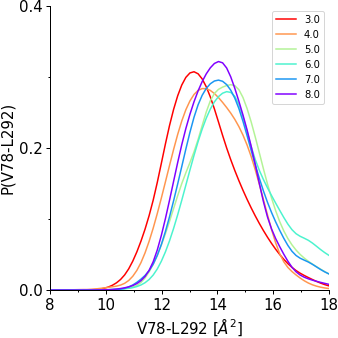

In [10]:
# Fold Cell
plt.close('all')

figrows = 1
figcols = 1
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (5, 5))
fig.set_facecolor('white')

for n, ph in enumerate(phs):
    bin_heights, bin_borders = np.histogram([x[1] for x in apo_data[n]], bins=30, range=(5, 20), density=True)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x1_new = np.linspace(bin_centers[0], bin_centers[-1], 100)
    a_BSpline = interpolate.make_interp_spline(bin_centers, bin_heights, k=3)
    y1_new = a_BSpline(x1_new)
    axes.plot(x1_new, y1_new, color=colors[n])

# Plot Details
axes.legend(phs)

axes.set_xlabel('V78-L292 [$\AA^2$]', fontsize=15)
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))

axes.set_ylabel('P(V78-L292)', fontsize=15)
axes.set_ylim(0, 0.4)
axes.set_yticks([0, 0.2, 0.4])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()

## Without Labels

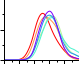

In [11]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points

for n, ph in enumerate(phs):
    bin_heights, bin_borders = np.histogram([x[1] for x in apo_data[n]], bins=30, range=(5, 20), density=True)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x1_new = np.linspace(bin_centers[0], bin_centers[-1], 100)
    a_BSpline = interpolate.make_interp_spline(bin_centers, bin_heights, k=3)
    y1_new = a_BSpline(x1_new)
    axes.plot(x1_new, y1_new, color=colors[n], markersize=ink_markersize, linewidth=ink_linewidth)


# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# X-Axis
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

# Y-Axis 
axes.set_ylim(0, 0.4)
axes.set_yticks([0, 0.2, 0.4])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

fig.tight_layout()
plt.savefig("plots/Asojo_pH_Distributions_apo.png", dpi=360, transparent=True)
plt.show()

# Holo Data

## With Labels

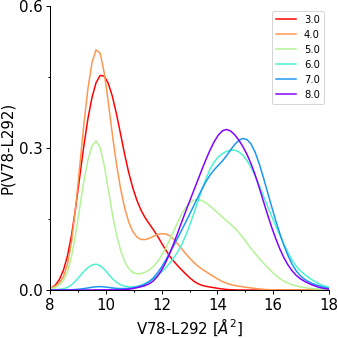

In [12]:
# Fold Cell
plt.close('all')

figrows = 1
figcols = 1
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (5, 5))
fig.set_facecolor('white')

for n, ph in enumerate(phs):
    bin_heights, bin_borders = np.histogram([x[1] for x in holo_data[n]], bins=30, range=(5, 20), density=True)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x1_new = np.linspace(bin_centers[0], bin_centers[-1], 100)
    a_BSpline = interpolate.make_interp_spline(bin_centers, bin_heights, k=3)
    y1_new = a_BSpline(x1_new)
    axes.plot(x1_new, y1_new, color=colors[n])

# Plot Details
axes.legend(phs)

axes.set_xlabel('V78-L292 [$\AA^2$]', fontsize=15)
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))

axes.set_ylabel('P(V78-L292)', fontsize=15)
axes.set_ylim(0, 0.6)
axes.set_yticks([0, 0.3, 0.6])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()

## Without Labels

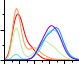

In [13]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize=(ink_x, ink_y))
fig.set_facecolor('white')

# plot points

for n, ph in enumerate(phs):
    bin_heights, bin_borders = np.histogram([x[1] for x in holo_data[n]], bins=30, range=(5, 20), density=True)
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    x1_new = np.linspace(bin_centers[0], bin_centers[-1], 100)
    a_BSpline = interpolate.make_interp_spline(bin_centers, bin_heights, k=3)
    y1_new = a_BSpline(x1_new)
    axes.plot(x1_new, y1_new, color=colors[n], markersize=ink_markersize, linewidth=ink_linewidth)


# plot details
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# X-Axis
axes.set_xlim(8, 18)
axes.set_xticks([8, 10, 12, 14, 16, 18])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

# Y-Axis 
axes.set_ylim(0, 0.6)
axes.set_yticks([0, 0.3, 0.6])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)

fig.tight_layout()
plt.savefig("plots/Asojo_pH_Distributions_holo.png", dpi=360, transparent=True)
plt.show()